## Исследование данных о российском кинопрокате



Заказчик исследования — Министерство культуры Российской Федерации. 

Задача - изучить рынок российского кинопроката и выявить текущие тренды, уделить внимание фильмам, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю. 

Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

In [1]:
!pip install missingno

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
try:
    data_mkrf_movies = pd.read_csv('mkrf_movies.csv')
except:
    data_mkrf_movies = pd.read_csv('/Users/olesyashtangey/Desktop/Projects/Сборный проект/mkrf_movies.csv')

In [4]:
try:
    data_mkrf_shows = pd.read_csv('mkrf_shows.csv')
except:
    data_mkrf_shows = pd.read_csv('/Users/olesyashtangey/Desktop/Projects/Сборный проект/mkrf_shows.csv')

In [5]:
data_mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
data_mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Чтобы совместить две таблицы по одинаковым столбцам, нужно чтобы типы данных этих столбцов были одинаковыми. 

Для этого необходимо привести тип данных `'object'` столбца `'puNumber'` в таблице `'data_mkrf_movies'` к типу `'int'`. 

In [7]:
data_mkrf_movies.puNumber = pd.to_numeric(data_mkrf_movies.puNumber, downcast='integer',  errors='coerce')

In [8]:
data = data_mkrf_movies.merge(data_mkrf_shows, how = 'left', left_on='puNumber', right_on='puNumber')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [10]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.0,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.0,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416.0,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.0,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.0,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


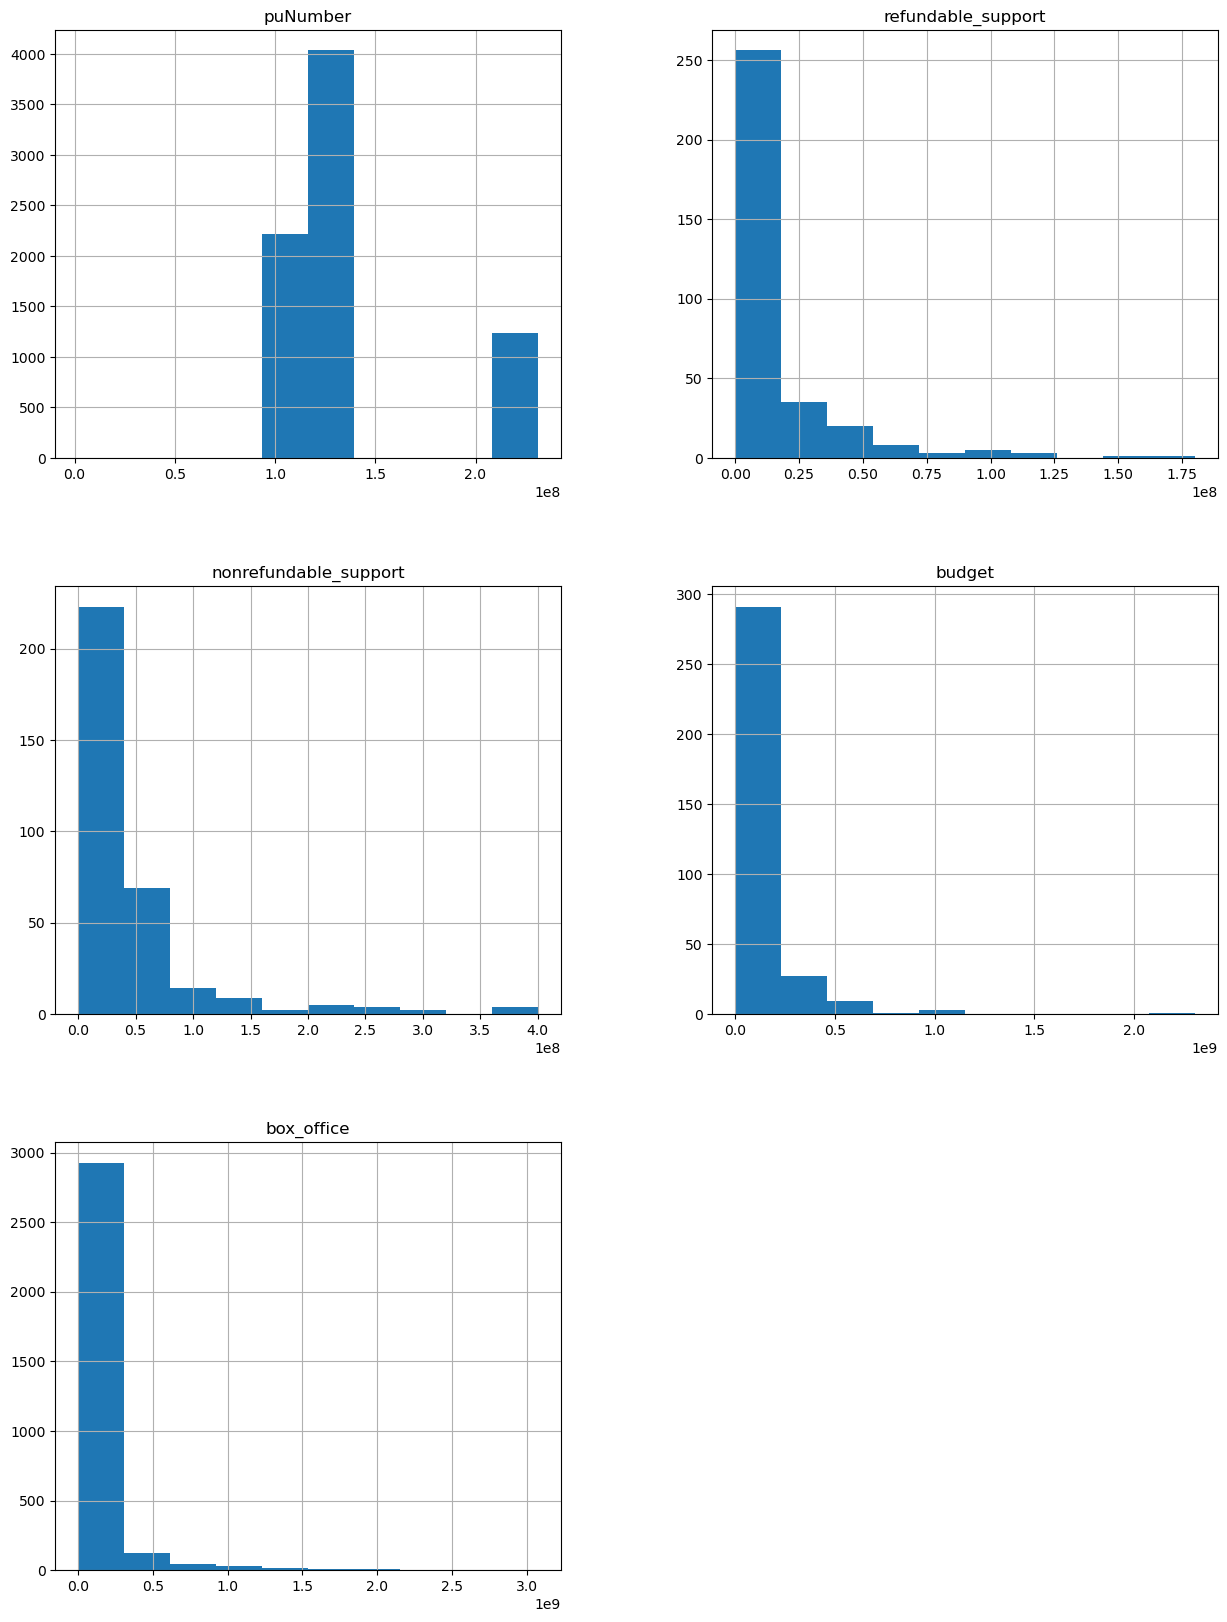

In [11]:
data.hist(figsize=(15, 20));

**Описание данных**

Датасет состоит из 16 колонок и 7486 строк.

Описание колонок:
 - `title` — название фильма;
 - `puNumber` — номер прокатного удостоверения;
 - `show_start_date` — дата премьеры фильма;
 - `type` — тип фильма;
 - `film_studio` — студия-производитель;
 - `production_country` — страна-производитель;
 - `director` — режиссёр;
 - `producer` — продюсер;
 - `age_restriction` — возрастная категория;
 - `refundable_support` — объём возвратных средств государственной поддержки;
 - `nonrefundable_support` — объём невозвратных средств государственной поддержки;
 - `financing_source` — источник государственного финансирования;
 - `budget` — общий бюджет фильма;
 - `ratings` — рейтинг фильма на КиноПоиске;
 - `genres` — жанр фильма;
 - `box_office` — сборы в рублях.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [12]:
data[~data.refundable_support.isna()].head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313.0,2013-10-11T12:00:00.000Z,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6
1448,Бесславные придурки,111003314.0,2014-03-28T12:00:00.000Z,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,28140.0
1498,Невидимки,111004213.0,2013-09-10T12:00:00.000Z,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5
1524,БЕРЦЫ,111004314.0,2014-05-05T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5
1792,Братья Ч,111004414.0,2014-04-23T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0
1854,Тайна Сухаревой башни. Чародей равновесия,114000115.0,2015-02-18T12:00:00.000Z,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.0,25000000.0,51850000.0,Министерство культуры,6.1,"мультфильм,фэнтези,история",15078858.6
1870,А зори здесь тихие..._,111002915.0,2015-03-16T12:00:00.000Z,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000.0,100000000.0,220588394.0,Фонд кино,8.5,"драма,военный,история",249166767.7
1871,Две женщины,111013714.0,2014-10-02T12:00:00.000Z,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.0,46502299.0,86210067.0,"Министерство культуры, Фонд кино",6.7,драма,4731239.5
1903,Призрак_.,111001815.0,2015-03-02T12:00:00.000Z,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.0,75000000.0,139551503.0,Фонд кино,7.0,"триллер,боевик,приключения",352804320.4
1912,Ведьма .,111002215.0,2015-03-05T12:00:00.000Z,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.0,34000000.0,48571430.0,Министерство культуры,7.4,"фэнтези,приключения,драма",51907.5


Типы данных необходимо пометь в следующих столбцах:
- `'puNumber'`: тип `float` необходимо привести к типу `int`;
- `'show_start_date'`: тип `object` необходимо привести к типу `datetime`;
- `'ratings'`: тип `object` необходимо привести к типу `float`.

In [13]:
data.puNumber.isna().sum()

1

Чтобы тип в столбце `'puNumber'` корректно поменялся на `'int'`, нужно сначала избавиться от пропуска.

In [14]:
data = data.dropna(subset=['puNumber']).reset_index(drop=True)

In [15]:
data.puNumber = pd.to_numeric(data.puNumber, downcast='integer', errors='coerce')

In [16]:
# 2014-03-28T12:00:00.000Z
data.show_start_date = pd.to_datetime(data.show_start_date, format='%Y-%m-%dT%H:%M:%S.%fZ')

In [17]:
data.ratings = pd.to_numeric(data.ratings, downcast='float',  errors='coerce')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int32         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [20]:
pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.240000
production_country,0.030000
director,0.120000
producer,7.590000
age_restriction,0.000000
refundable_support,95.560000


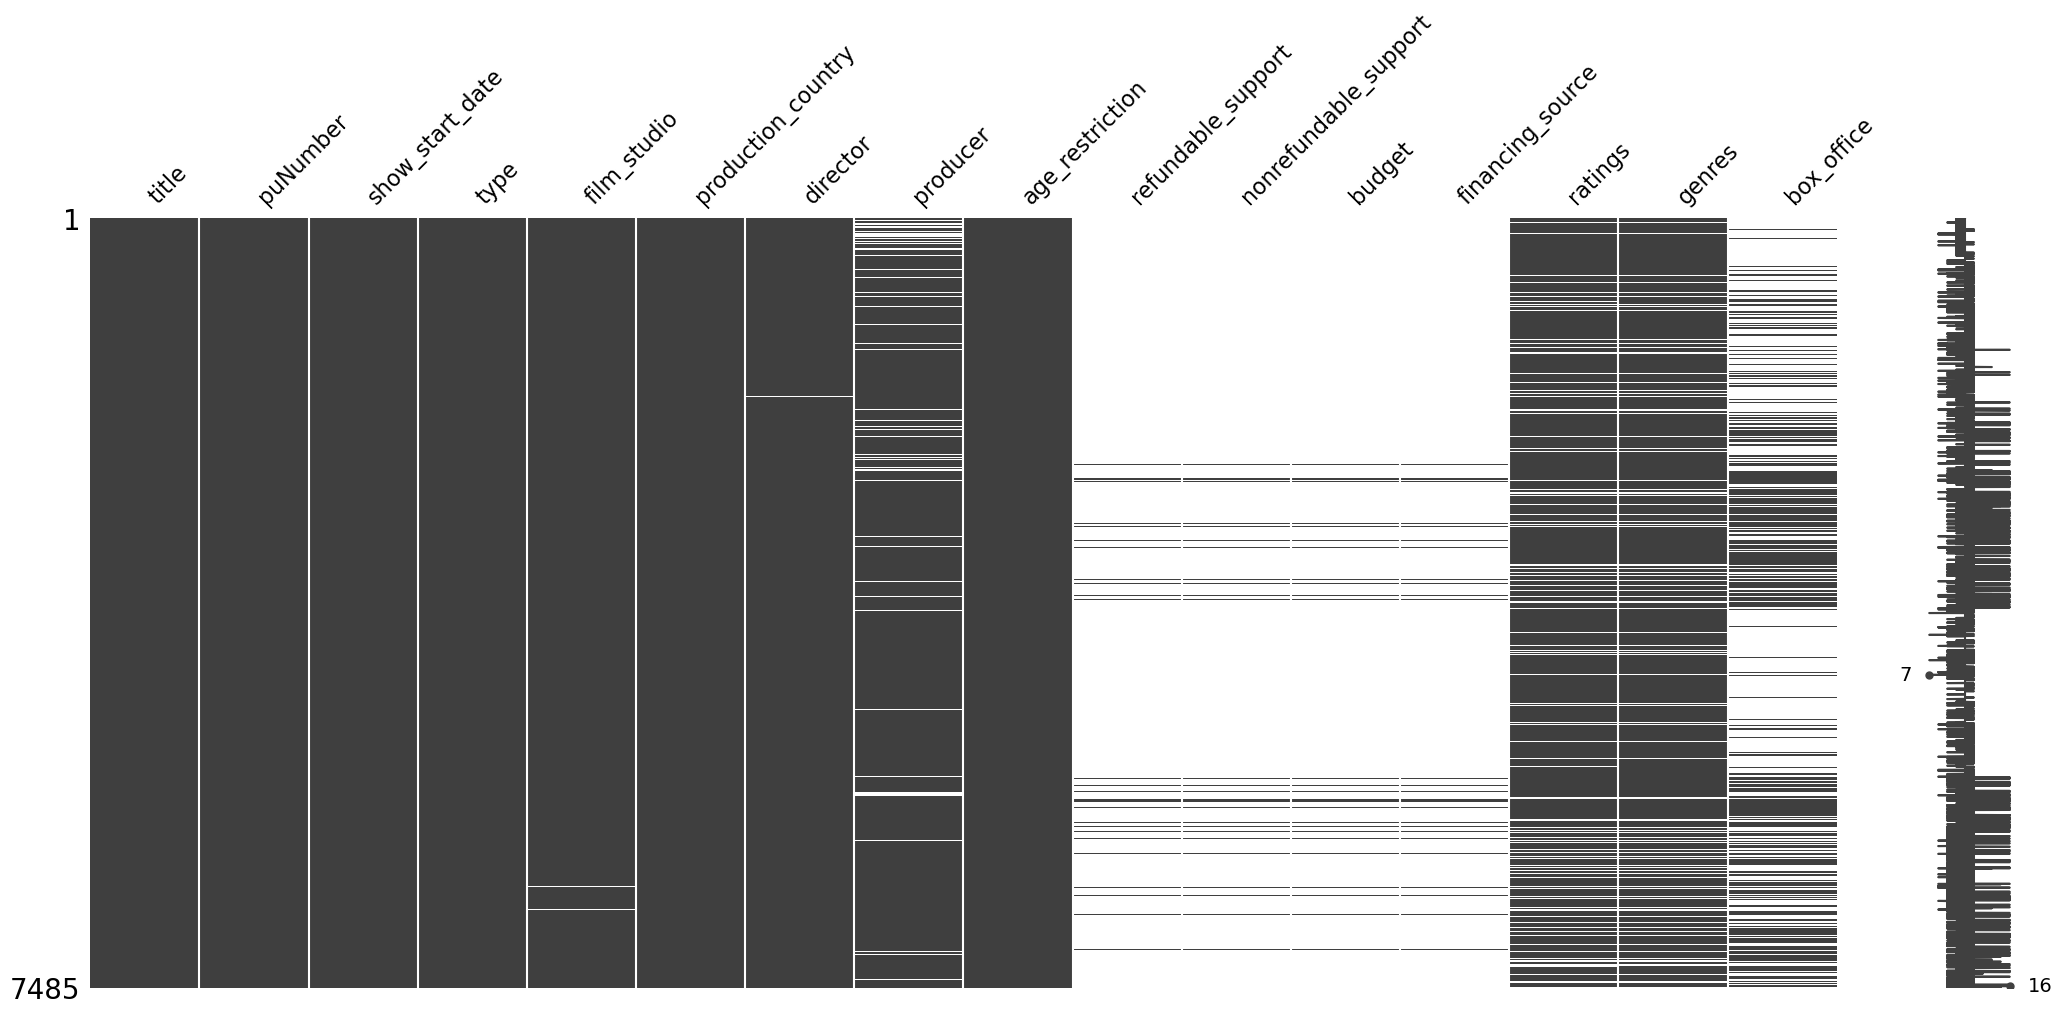

In [21]:
msno.matrix(data);

В столбцах `'production_country'`, `'director'`, `'film_studio'` слишком мало пропусков, меньше 0,5%, поэтому лучше всего их удалить.

In [22]:
data = data.dropna(subset=['production_country', 'director', 'film_studio']).reset_index(drop=True)

В колонках `'producer'` и `'genres'` пропуски можно заменить на `'unknow'`.

In [23]:
data[['producer', 'genres']] = data[['producer', 'genres']].fillna('unknow')

В столбцах `'refundable_support'`, `'nonrefundable_support'`, `'budget'`, `'financing_source'` одинаковое значение пропусков, по матрице ненулевых значений видно, что они связаны, более подробно рассмотрю их в пункте 2.5.

В столбце `'box_office'` больше 50% пропусков, однако до соединения двух таблиц, у датасета, в котором содержались значения `'box_office'`, изначально было меньше значений. При соединении данные не потерялись. Что касается колонки с рейтингами, здесь пропусков 13%, удалять такое кол-во данных не считаю целесообразным, логической замены предложить не могу, поэтому оставлю пропуски в этих колонках.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [24]:
data.duplicated().sum()

0

Явных дубликатов в данных нет.

In [25]:
data.title.value_counts().head(10)

День святого Валентина_                               5
Химера                                                4
Рапунцель: Запутанная история                         4
Белая мгла /По комиксу Грега Рукка и Стива Либера/    4
Непокоренный.                                         4
Жена путешественника во времени                       4
Дитя тьмы                                             4
Безумцы                                               4
Кошки против собак: Месть Китти Галор                 4
Прощание                                              4
Name: title, dtype: int64

В данных есть повторяющиеся названия фильмов, скорее всего это перезапуски проката. 

In [26]:
data.puNumber.nunique()

7456

In [27]:
data.shape

(7458, 16)

In [28]:
data.puNumber.value_counts().head()

221054410    2
221154310    2
121010811    1
221049511    1
221049411    1
Name: puNumber, dtype: int64

В данных есть фильмы с одинаковым номером проката, скорее всего это ошибка, так как каждому фильму должен соответствовать только один номер иначе может возникнуть путаница, такие данные лучше удалить.

In [29]:
data = data.loc[(data.puNumber != 221154310) & (data.puNumber != 221054410)]

In [30]:
data.film_studio.value_counts().head()

Киностудия "Мосфильм"                     341
ООО "Мульт в кино"                         57
Анимаккорд Лтд                             23
ООО "Мульт в кино"                         18
ФГУП "ТПО "Киностудия "Союзмультфильм"     16
Name: film_studio, dtype: int64

In [31]:
data.loc[data.film_studio == 'Эр А И Синема', 'film_studio'] = 'Р А И Синема'

In [32]:
data.loc[data.film_studio == 'Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз', 'film_studio'] = 'Уолт Дисней Пикчерз'

In [33]:
data.loc[data.film_studio == 'Опус Арт', 'film_studio'] = 'Опус Арте'

В данных есть студии с оригинальным названием на английском языке, однако их записывали на русский манер. Не всегда корректно можно передать иностранное название русским языком. Гораздо удобнее было бы их заполнять на оригинальном языке, либо принять единую систему русификации слов.

In [34]:
data.production_country.value_counts().head()

США               2170
Россия            1801
СССР               347
Франция            300
Великобритания     253
Name: production_country, dtype: int64

In [35]:
arr = ['США-Великобритания', 'Великобритания - США', 'Великобритания-США']
data.loc[data.production_country.isin(arr), 'production_country'] = 'США - Великобритания'

In [36]:
arr = ['Франция - США', 'Франция-США', 'США-Франция']
data.loc[data.production_country.isin(arr), 'production_country'] = 'США - Франция'

In [37]:
arr = ['США-Германия', 'Германия-США', 'Германия - США']
data.loc[data.production_country.isin(arr), 'production_country'] = 'США - Германия'

In [38]:
arr = ['Канада - США', 'Канада-США', 'США-Канада']
data.loc[data.production_country.isin(arr), 'production_country'] = 'США - Канада'

In [39]:
arr = ['Россия, Республика Кипр', 'Россия-Кипр']
data.loc[data.production_country.isin(arr), 'production_country'] = 'Россия - Республика Кипр'

In [40]:
arr = ['Франция, Бельгия', 'Франция-Бельгия', 'Бельгия-Франция', 'Бельгия - Франция']
data.loc[data.production_country.isin(arr), 'production_country'] = 'Франция - Бельгия'

In [41]:
arr = ['Италия-Франция', 'Франция - Италия', 'Франция-Италия']
data.loc[data.production_country.isin(arr), 'production_country'] = 'Италия - Франция'

In [42]:
arr = ['КНР - США', 'КНР-США', 'США-КНР']
data.loc[data.production_country.isin(arr), 'production_country'] = 'США - КНР'

In [43]:
arr = ['США-Австралия', 'Австралия-США', 'Австралия - США']
data.loc[data.production_country.isin(arr), 'production_country'] = 'США - Австралия'

In [44]:
arr = ['Франция - Великобритания', 'Франция-Великобритания', 'Великобритания-Франция']
data.loc[data.production_country.isin(arr), 'production_country'] = 'Великобритания - Франция'

In [45]:
data.loc[data.production_country == 'Китай', 'production_country'] = 'КНР'

В столбце со страной-производителем фильма много дубликатов в строках с несколькими странами - участниками, часто проблема встречается в наличии пробелов около знака "-", где-то он есть, а где-то его нет: `'КНР - США'` и `'КНР-США'`. Кое-где страны перечисляются через запятую: `'Франция, Бельгия'` и `'Франция - Бельгия'`, а где-то перепутан порядок: `'Франция - Италия'` и `'Италия - Франция'`. Скорее всего данные записывали разные люди, и такая путанница вызвана отсутствием общепринятого порядка записи данных.

В столбцах `'type'`, `'film_studio'`, `'production_country'`, `'director'` есть повторяющиеся значения, но считаются они разными, скорее всего здесь есть проблемы с пробелами.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

In [46]:
data.type.value_counts()

Художественный                4509
 Художественный               1384
Анимационный                   828
Прочие                         401
Документальный                 280
Научно-популярный               50
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

В столбце `'type'` есть одинаковые значения, но написаны они по-разному: `'Художественный'` `' Художественный'`, разница в пробеле, который стоит вначале слова. В других столбцах есть похожие проблемы, отличающиеся в наличии пробелов в конце строки.

In [47]:
data.type = data.type.str.strip()

In [48]:
data.film_studio = data.film_studio.str.strip()

In [49]:
data.production_country = data.production_country.str.strip()

In [50]:
data.director = data.director.str.strip()

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

In [51]:
data.budget[~data.budget.isna()].count()

332

In [52]:
data.refundable_support[~data.refundable_support.isna()].count()

332

In [53]:
data.nonrefundable_support[~data.nonrefundable_support.isna()].count()

332

In [54]:
data[(~data.budget.isna()) & (~data.refundable_support.isna()) & (~data.nonrefundable_support.isna())].count()

title                    332
puNumber                 332
show_start_date          332
type                     332
film_studio              332
production_country       332
director                 332
producer                 332
age_restriction          332
refundable_support       332
nonrefundable_support    332
budget                   332
financing_source         332
ratings                  314
genres                   332
box_office               318
dtype: int64

У столбцов `'budget'`, `'refundable_support'`, `'nonrefundable_support'` одинаковое кол-во значений и пропусков, при этом столбец `'budget'` уже включает в себя полный объём государственной поддержки. Это значит, что данные в этих столбцах связаны и указаны они только для тех фильмов, которые получили государственную поддержку.

Кол-во таких фильмов 332, их немного, но удалять их не считаю целесообразным.

In [55]:
# общий бюджет фильма - 'budget'
# государственная поддержка - 'refundable_support' + 'nonrefundable_support'
data[data.budget < (data.refundable_support + data.nonrefundable_support)]['title'].count()

17

В данных есть 17 фильмов, у которых государственная поддержка больше общего бюджета, скорее всего в данных есть ошибка. Такие строки лучше удалить.

In [56]:
data = data[~(data.budget < (data.refundable_support + data.nonrefundable_support))]

In [57]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.437000e+03,3.150000e+02,3.150000e+02,3.150000e+02,6462.000000,3.138000e+03
mean,1.352211e+08,1.160317e+07,4.810704e+07,1.340961e+08,6.480324,7.608225e+07
std,3.834545e+07,2.515144e+07,5.988614e+07,1.912260e+08,1.101528,2.403536e+08
min,1.811096e+06,0.000000e+00,0.000000e+00,1.446246e+07,1.000000,0.000000e+00
25%,1.130002e+08,0.000000e+00,2.500000e+07,4.615387e+07,5.900000,8.445750e+04
50%,1.210156e+08,0.000000e+00,3.000000e+07,7.337955e+07,6.600000,2.310153e+06
75%,1.240033e+08,1.000000e+07,4.000000e+07,1.500043e+08,7.200000,2.345784e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,3.073569e+09


В трех столбцах, `'refundable_support'`, `'nonrefundable_support'` и `'box_office'`, минимальное значение равно 0. 

Для столбца с объёмом возвратных средств государственной поддержки это может означать, что возвращать деньги поддержки им не нужно.

In [58]:
data[(data.nonrefundable_support == 0)]['title'].count()

8

In [59]:
data[(data.nonrefundable_support == 0) & (data.refundable_support == 0)]['title'].count()

0

В столбцах `'nonrefundable_support'` и `'refundable_support'` строки с 0 не совпадают, это может означать, что фильмам, у которых объём невозвратных средств государственной поддержки равен 0, нужно вернуть полную сумму поддержки.

In [60]:
data[data.box_office == 0]['title'].count()

24

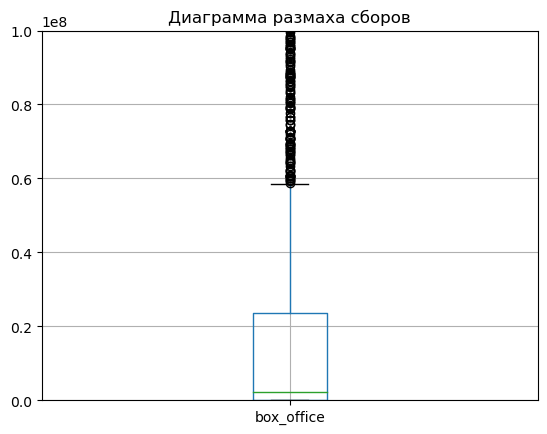

In [61]:
plt.ylim(0, 100_000_000)
plt.title('Диаграмма размаха сборов')
data.boxplot(column='box_office');

In [62]:
data.box_office.value_counts().sort_values()

8335973.79     1
5280.00        1
4827.00        1
80.00          1
865.00         1
              ..
400.00         8
360.00         9
300.00        12
200.00        13
0.00          24
Name: box_office, Length: 2918, dtype: int64

In [63]:
data[data.box_office <= 10_000]['title'].count()

539

В столбце с объемом сборов значения разнятся в диапозоне от 0 до 3_073_569_000, медиана равна 2_310_153. При этом известно что суммы указаны в рублях и значений меньше 10_000р 539 шт - это выглядит странно - слишком много небольших значений сборов. Возможно во время записи данных указали сумму не в той валюте или не дописали нули. Думаю, что значения меньше 1000 лучше удалить.

In [64]:
data = data[(data.box_office.isna()) | (data.box_office >= 1000)]

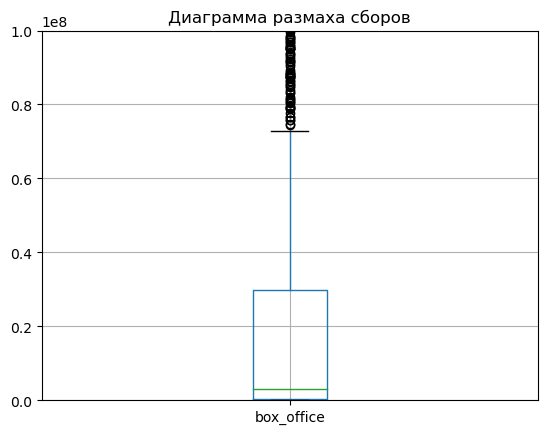

In [65]:
plt.ylim(0, 100_000_000)
plt.title('Диаграмма размаха сборов')
data.boxplot(column='box_office');

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [66]:
data['year_show_start'] = data.show_start_date.dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [67]:
def first_value(r):
    if ',' in r:
        ind = r.index(',')
        return r[:ind]
    else:
        return r

In [68]:
data['main_director'] = data.director.apply(first_value)

In [69]:
data.main_director.value_counts()

О.Семёнова          60
Д.Червяцов          17
Стивен Содерберг    17
Ридли Скотт         15
Тиль Швайгер        13
                    ..
И.Найтшуллер         1
Вано Бурдули         1
Т.Сличенко           1
Жан-Мари Пуаре       1
И.Трусов             1
Name: main_director, Length: 4496, dtype: int64

In [70]:
data[data.main_director == 'хореография Карлоса Акосты по Мариусу Петипа']['title']

1716    Людвиг Минкус. Дон Кихот /По роману Мигеля Сер...
Name: title, dtype: object

In [71]:
data.shape

(7206, 18)

In [72]:
data = data[data.main_director != 'хореография Карлоса Акосты по Мариусу Петипа']

In [73]:
data.shape

(7205, 18)

In [74]:
data['main_genres'] = data.genres.apply(first_value)

In [75]:
data.main_genres.value_counts()

драма              1625
unknow              946
комедия             655
боевик              593
ужасы               557
мультфильм          510
триллер             509
фантастика          398
мелодрама           368
фэнтези             341
документальный      217
аниме                71
мюзикл               62
детектив             54
приключения          52
военный              46
криминал             37
семейный             32
биография            32
детский              26
история              24
короткометражка      12
концерт              10
спорт                 9
вестерн               7
музыка                7
для взрослых          3
фильм-нуар            1
реальное ТВ           1
Name: main_genres, dtype: int64

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [76]:
data['share_state_support'] = (data.refundable_support + data.nonrefundable_support) / data.budget 

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

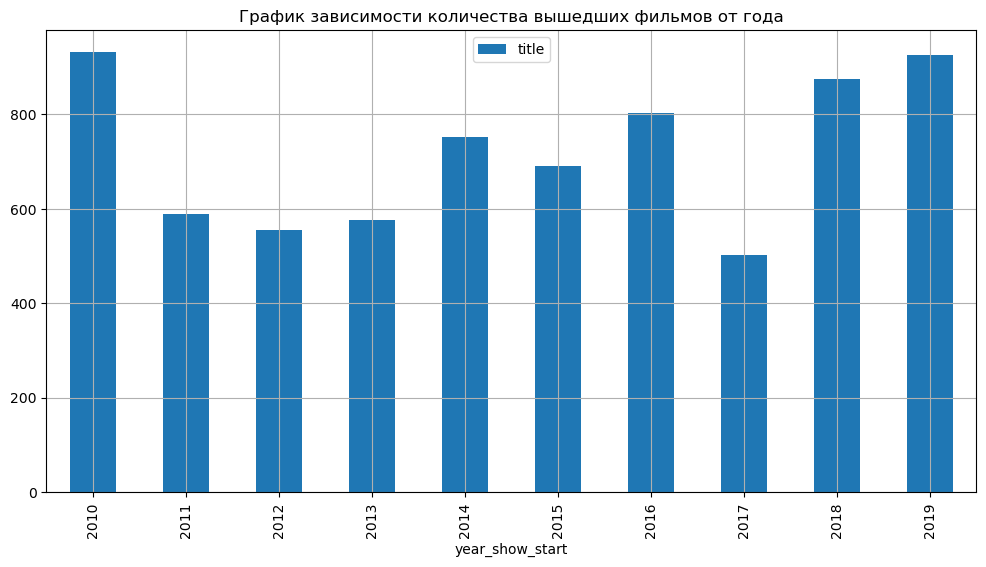

In [77]:
(data
    .pivot_table(index='year_show_start', values='title', aggfunc='count')
    .sort_values(by='year_show_start')
    .plot(title='График зависимости количества вышедших фильмов от года',
          kind='bar',
          grid=True, 
          figsize=(12, 6))
);

Информация о прокате содержится в столбцах: `'title'`, `'puNumber'`, `'show_start_date'` и `'box_office'`. Самым малочисленным из них является столбец `'box_office'`, по нему можно сделать срез и еще раз посмотреть сколько фильмов выходило в прокат каждый год, но уже для тех, кто имеет всю информацию.

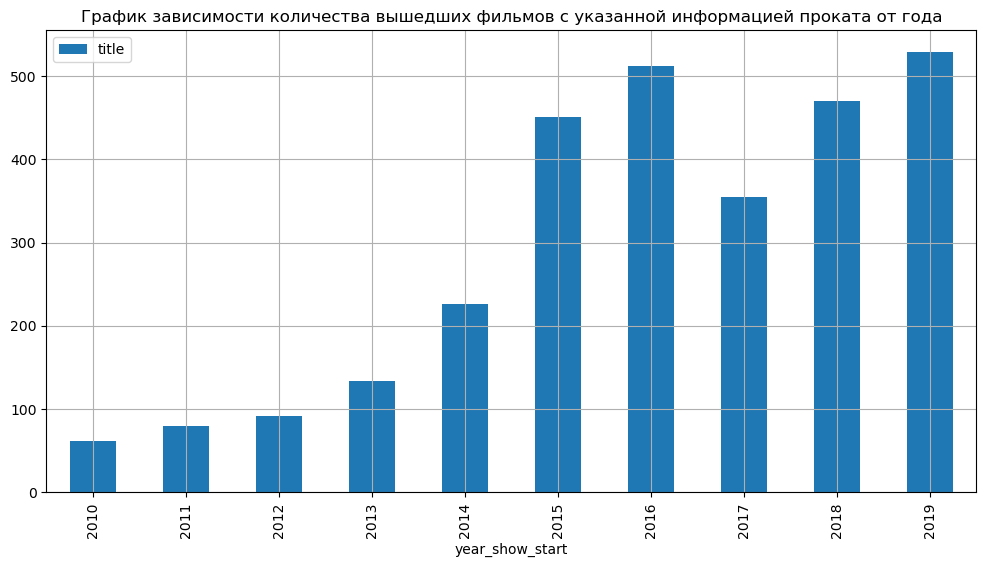

In [78]:
(data
    .query('~box_office.isna()')
    .pivot_table(index='year_show_start', values='title', aggfunc='count')
    .sort_values(by='year_show_start')
    .plot(title='График зависимости количества вышедших фильмов с указанной информацией проката от года',
          kind='bar',
          grid=True, 
          figsize=(12, 6))
);

In [79]:
data.box_office.count() / data.year_show_start.count()

0.403469812630118

In [80]:
(data
    .query('~box_office.isna()')
    .pivot_table(index='year_show_start', values='title', aggfunc='count')
    .sort_values(by='year_show_start')
) / (data
    .pivot_table(index='year_show_start', values='title', aggfunc='count')
    .sort_values(by='year_show_start')
)

,title
year_show_start,
2010,0.065451
2011,0.133898
2012,0.163669
2013,0.230503
2014,0.300532
2015,0.652677
2016,0.636816
2017,0.705765
2018,0.537143


**Вывод:** доля фильмов с указанной информацией о прокате в кинотеатрах составила 0.45. Можно заметить, как с 2010г по 2016г и с 2017г по 2019г увеличивалось кол-во фильмов с полной информацией. Также в период с 2010г по 2017г за исключением 2016г наблюдается тенденция увеличения доли фильмов с указанной информацией о прокате в кинотеатрах. С 2017г по 2019г наблюдается спад этой тенденции. Период с 2015г по 2019г полнее всего представлен в данных.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

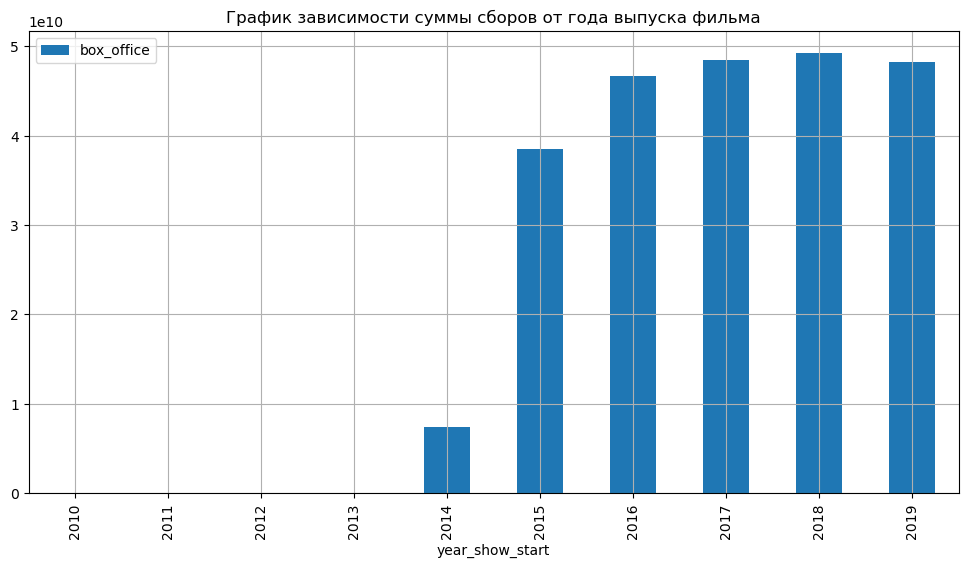

In [81]:
(data
    .query('~box_office.isna()')
    .pivot_table(index='year_show_start', values='box_office', aggfunc='sum')
    .sort_values(by='year_show_start')
    .plot(title='График зависимости суммы сборов от года выпуска фильма',
          kind='bar',
          grid=True,
          figsize=(12, 6))
);

In [82]:
data.pivot_table(index='year_show_start', values='box_office', aggfunc='sum')

,box_office
year_show_start,
2010,2.412679e+06
2011,1.408936e+07
2012,6.897933e+06
2013,2.977879e+07
2014,7.434696e+09
2015,3.852783e+10
2016,4.674212e+10
2017,4.845815e+10
2018,4.925195e+10


**Вывод:** динамика проката фильмов за большую часть времени (период с 2012г по 2018г) положительна, в 2010 году сумма сборов была минимальной и составила 2_428_654, в 2018 году - максимальной - 49_251_950_000.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [83]:
data.pivot_table(index='year_show_start', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
year_show_start,,
2010,3.955211e+04,4530.00
2011,1.783463e+05,5695.00
2012,7.580146e+04,11400.00
2013,2.239007e+05,7104.00
2014,3.289689e+07,128005.00
2015,8.542755e+07,5034342.40
2016,9.129320e+07,4091820.05
2017,1.365018e+08,9919415.00


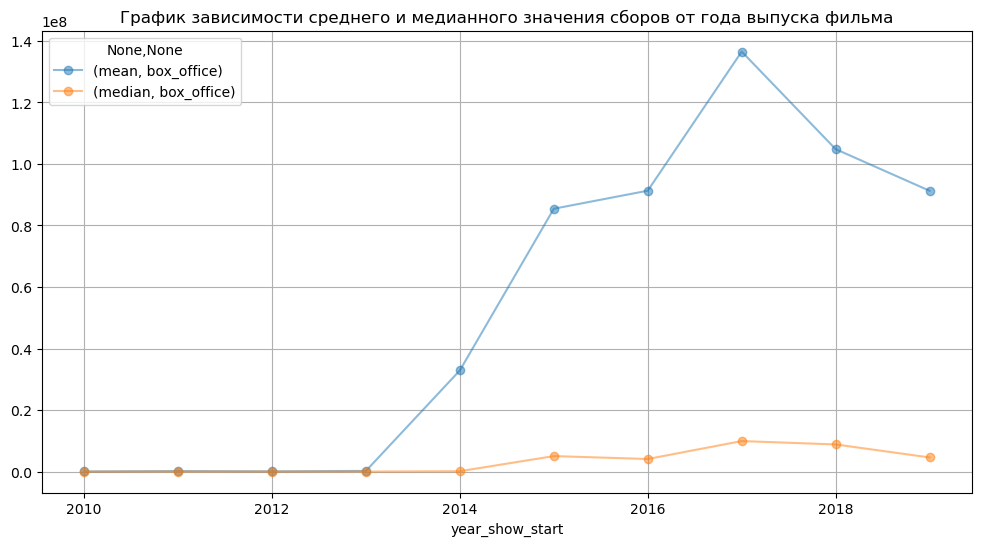

In [84]:
(data
    .pivot_table(index='year_show_start', values='box_office', aggfunc=['mean', 'median'])
    .plot(title='График зависимости среднего и медианного значения сборов от года выпуска фильма',
          style='-o',
          alpha=0.5,
          grid=True,
          figsize=(12, 6))
);

**Вывод:** с 2010г по 2013г среднее значение мало отличается от медианы, а начиная с 2014г и по 2019г разница оказывается существенной: среднее значение становится намного больше медианного. Это значит, что с 2014г сборы отдельных фильмов стали намного больше. Возможно, с 2014г в кино стали появляться очень популярные фильмы.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

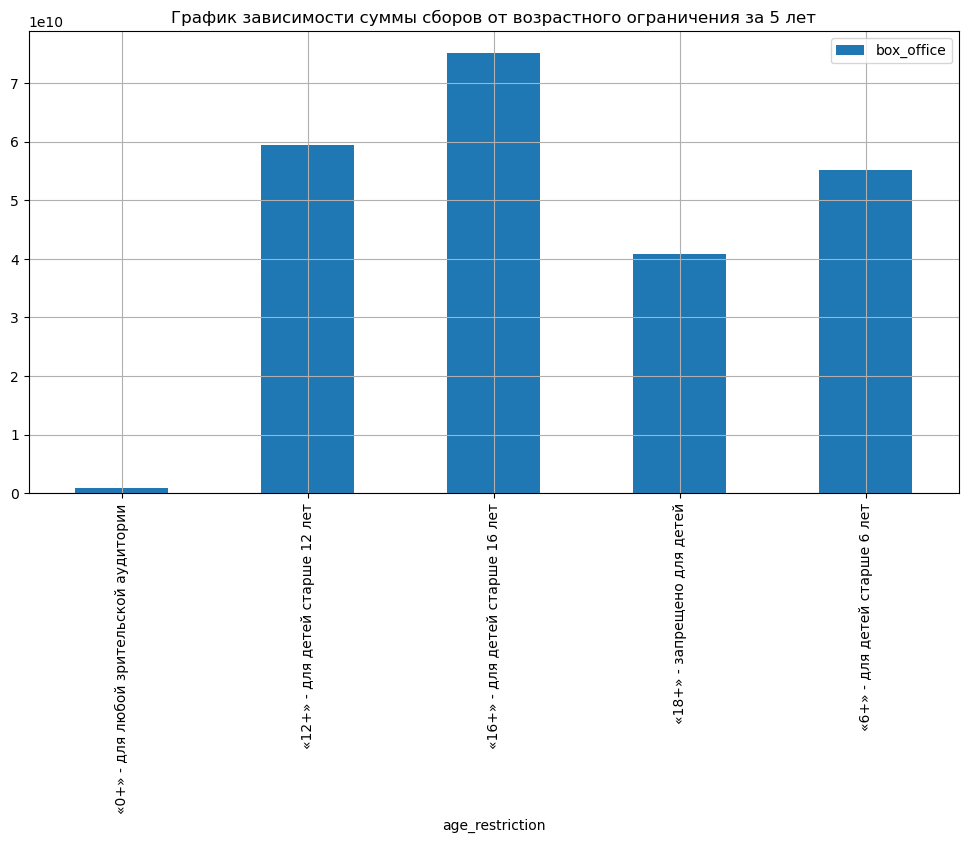

In [85]:
(data
    .query('2015 <= year_show_start <= 2019')
    .pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
    .plot(title='График зависимости суммы сборов от возрастного ограничения за 5 лет',
          kind='bar',
          grid=True,
          figsize=(12, 6))
);

**Вывод:** фильмы с возрастным ограничением "16+" собрали больше всего денег в прокате, чуть меньше набрали фильмы с возрастным ограничением "12+", фильмы для любой зрительской аудитории набрали меньше всего денег в прокате. 

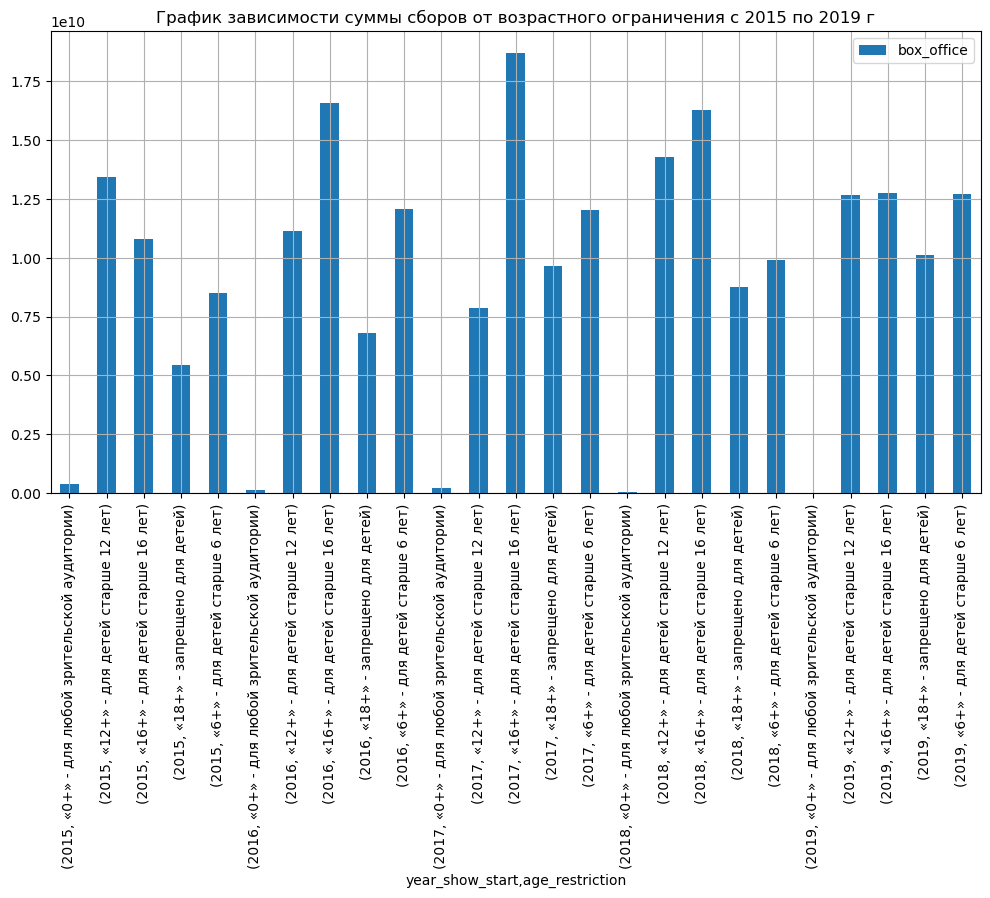

In [86]:
(data
    .query('2015 <= year_show_start <= 2019')
    .pivot_table(index=['year_show_start', 'age_restriction'], values='box_office', aggfunc='sum')
    .plot(title='График зависимости суммы сборов от возрастного ограничения c 2015 по 2019 г',
          kind='bar',
          grid=True,
          figsize=(12, 6))
);

In [87]:
(data
    .query('2015 <= year_show_start <= 2019')
    .pivot_table(index=['year_show_start', 'age_restriction'], values='box_office', aggfunc='sum'))

box_office
year_show_start age_restriction                                     
2015            «0+» - для любой зрительской аудитории  3.790544e+08
                «12+» - для детей старше 12 лет         1.341951e+10
                «16+» - для детей старше 16 лет         1.078160e+10
                «18+» - запрещено для детей             5.430351e+09
                «6+» - для детей старше 6 лет           8.517311e+09
2016            «0+» - для любой зрительской аудитории  1.500338e+08
                «12+» - для детей старше 12 лет         1.115076e+10
                «16+» - для детей старше 16 лет         1.659425e+10
                «18+» - запрещено для детей             6.793929e+09
                «6+» - для детей старше 6 лет           1.205314e+10
2017            «0+» - для любой зрительской аудитории  2.295989e+08
                «12+» - для детей старше 12 лет         7.851428e+09
                «16+» - для детей старше 16 лет         1.869459e+10
                «18+» - запрещено для детей             9.651496e+09
                «6+» - для детей старше 6 лет           1.203103e+10
2018            «0+» - для любой зрительской аудитории  3.244900e+07
                «12+» - для детей старше 12 лет         1.426725e+10
                «16+» - для детей старше 16 лет         1.627841e+10
                «18+» - запрещено для детей             8.760086e+09
                «6+» - для детей старше 6 лет           9.913759e+09
2019            «0+» - для любой зрительской аудитории  1.774607e+07
                «12+» - для детей старше 12 лет         1.268020e+10
                «16+» - для детей старше 16 лет         1.275342e+10
                «18+» - запрещено для детей             1.012180e+10
                «6+» - для детей старше 6 лет           1.270494e+10

**Вывод:** меньше всего сборов на протяжении всех 5 лет получают фильмы для любой зрительской аудитории ("0+"), скорее всего такие фильмы считают "скучными". 4 года подряд с 2016 по 2019 больше всего денег в прокате собирают фильмы с возрастным ограничением "16+". 

Возможно такая тенденция связана с тем, что чаще всего в кино ходят подростки и молодые люди, а такой возрастной группе интересны фильмы с более жесткими сценами (в сравнении с фильмами "6+"). 

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [88]:
films_state_support = data.loc[~data.budget.isna()].reset_index(drop=True)

In [89]:
films_state_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show_start,main_director,main_genres,share_state_support
0,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,0.333703
1,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,unknow,28140.0,2014,А.Якимчук,unknow,0.700000
2,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,0.612691
3,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095
4,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0,2014,М.Угаров,драма,0.624764


In [90]:
films_state_support.refundable_support.sum() + films_state_support.nonrefundable_support.sum()

18808718847.0

In [91]:
films_state_support[films_state_support.box_office > films_state_support.budget]['title'].count()

66

In [92]:
films_state_support.share_state_support.describe()

count    315.000000
mean       0.517386
std        0.170043
min        0.044043
25%        0.373458
50%        0.592265
75%        0.656931
max        0.784745
Name: share_state_support, dtype: float64

In [93]:
films_state_support.year_show_start.unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019])

**Вывод:** гос поддержку с 2013г по 2019г получили 315 фильмов, на них было выделено 18_808_718_847, при этом доля гос поддержки составляет в среднем больше 50%. 66 фильмов из них окупились - это 21%.

In [94]:
films_state_support = films_state_support[~films_state_support.ratings.isna()]

In [95]:
films_state_support.ratings.describe()

count    298.000000
mean       6.015436
std        1.133406
min        1.000000
25%        5.400000
50%        6.200000
75%        6.700000
max        8.500000
Name: ratings, dtype: float64

In [96]:
data.ratings.describe()

count    6240.000000
mean        6.480328
std         1.097322
min         1.000000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.200000
Name: ratings, dtype: float64

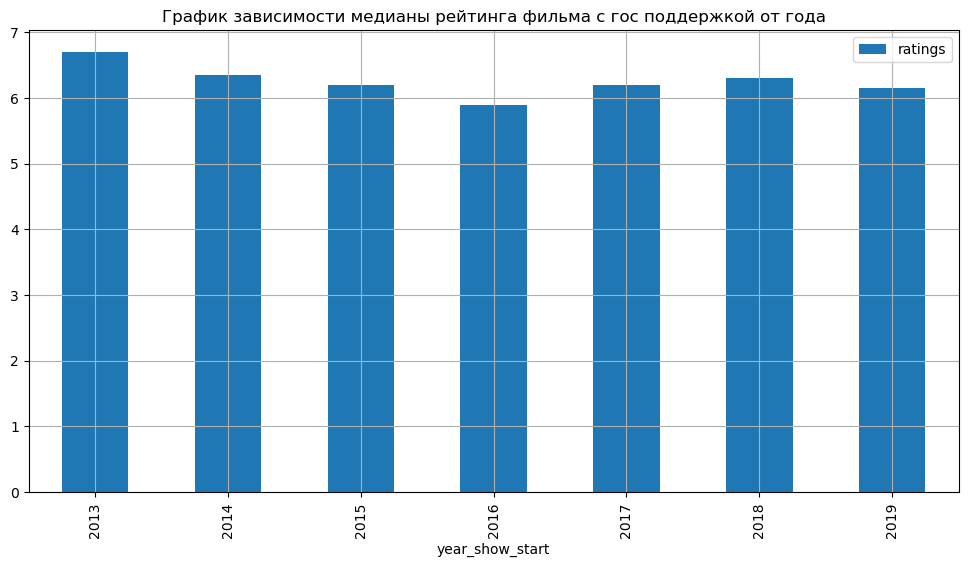

In [97]:
(films_state_support
    .pivot_table(index='year_show_start', values='ratings', aggfunc='median')
    .plot(title='График зависимости медианы рейтинга фильма с гос поддержкой от года',
          kind='bar',
          grid=True,
          figsize=(12, 6))

);

**Вывод:** рейтинг фильмов, получивших гос поддержку, с 2013г по 2016г и с 2018г по 2019г стабильно уменьшается, при этом самое высокое значение рейтинга было зафиксировано в 2013г, самое низкое- в 2016г. Медианное значение рейтинга для всех фильмов, вышедших в прокат, равно 6.6, а для фильмов с гос поддержкой - 6.2. Это значит, что фильмы с гос поддержкой чуть менее интересны зрителю.

In [98]:
# топ 20 прибыльные фильмы с гос поддержкой
max_box_office_films_state_support = films_state_support.sort_values(by='box_office', ascending=False).head(20)
max_box_office_films_state_support

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show_start,main_director,main_genres,share_state_support
309,Холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,35000000.0,1.600000e+08,Фонд кино,6.8,комедия,3.073569e+09,2019,К.Шипенко,комедия,0.375000
194,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,400000000.0,5.901922e+08,Фонд кино,7.5,"спорт,драма",2.779686e+09,2017,А.Мегердичев,спорт,0.677745
245,Т-34,111024918,2018-12-21 12:00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000.0,120000000.0,5.637847e+08,Фонд кино,6.5,"драма,военный,боевик",2.271754e+09,2018,А.Сидоров,драма,0.319271
180,Последний богатырь,111007017,2017-10-19 12:00:00,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,50000000.0,50000000.0,3.524776e+08,Фонд кино,6.8,"комедия,фэнтези,приключения",1.655038e+09,2017,Д.Дьяченко,комедия,0.283706
87,Экипаж .,111005416,2016-03-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,50000000.0,392104482.0,6.352839e+08,Фонд кино,7.6,"драма,триллер,приключения",1.402255e+09,2016,Н.Лебедев,драма,0.695916
192,Ёлки Новые,111011617,2017-12-21 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпило...","Т.Бекмамбетов, Г.Стрижевская",«6+» - для детей старше 6 лет,50000000.0,50000000.0,1.743819e+08,Фонд кино,5.8,"комедия,мелодрама",8.554511e+08,2017,Д.Киселев,комедия,0.573454
208,Тренер,111003218,2018-04-19 12:00:00,Художественный,"ООО ""ДК интертеймент"", ООО ""Киностудия ""Слово""...",Россия,Д.Козловский,"Д.Козловский, П.Ануров, Л.Верещагин, А.Златопо...",«12+» - для детей старше 12 лет,0.0,260000000.0,3.901911e+08,Фонд кино,6.8,"драма,спорт",8.205280e+08,2018,Д.Козловский,драма,0.666340
195,Три богатыря и принцесса Египта,114003317,2017-12-21 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Феоктистов,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,50000000.0,0.0,1.744644e+08,Фонд кино,5.5,"мультфильм,приключения,семейный",7.592268e+08,2017,К.Феоктистов,мультфильм,0.286591
179,Салют-7,111006917,2017-10-01 12:00:00,Художественный,"ООО ""Лемон Филмз Студио""",Россия,К.Шипенко,"С.Сельянов, Б.Бакурадзе, А.Златопольский",«12+» - для детей старше 12 лет,0.0,225000000.0,4.937340e+08,Фонд кино,7.4,"драма,приключения,триллер",7.526798e+08,2017,К.Шипенко,драма,0.455711
310,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,9.800000e+08,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,0.510204


In [99]:
max_box_office_films_state_support.type.value_counts()

Художественный    16
Анимационный       4
Name: type, dtype: int64

In [100]:
max_box_office_films_state_support.main_genres.value_counts()

комедия        6
драма          5
мультфильм     4
история        2
спорт          1
приключения    1
фэнтези        1
Name: main_genres, dtype: int64

In [101]:
max_box_office_films_state_support.film_studio.value_counts()

ООО "Студия анимационного кино "Мельница"                                                       4
ООО "ТаББаК"                                                                                    3
ООО "Студия "ТРИТЭ" Никиты Михалкова"                                                           2
ООО "МЕМ-МЕДИА" по заказу АО "ВБД Груп"                                                         1
ООО "Кинокомпания МАРС-фильм" по заказу ООО "ММЕ", ООО "Амедиа Продакшн" и АО "Телекомпания"    1
ООО "Киностудия "Слово" по заказу ООО "Уолт Дисней Компании СНГ", АО "ВБД Груп"                 1
ООО "ДК интертеймент", ООО "Киностудия "Слово", ООО "Студия "ТРИТЭ" Никиты Михалкова"           1
ООО "Лемон Филмз Студио"                                                                        1
ЗАО "Дирекция кино"                                                                             1
ООО "Друг Друга", ООО "Ди Пи Джи"                                                               1
ООО "Продюсерский це

**Вывод:** фильмы набравшие больше всего сборов относятся к типам "Художественный" и "Анимационный" и студиям "ООО "Студия анимационного кино "Мельница"", "ООО "ТаББаК"" и "ООО "Студия "ТРИТЭ" Никиты Михалкова"", большинство из них имеет жанр "комедия", "драма" или "мультфильм".

### Шаг 5. Напишите общий вывод

**1. Обзор данных.**

В каждой строке таблицы - данные о фильмах, вышедших в прокат. Часть колонок описывает хакактеристики самого фильма: название, тип, жанр и рейтинг фильма, возрастная категория, номер прокатного удостоверения, дата премьеры фильма, студия-производитель, страна-производитель, режиссёр, продюсер. Другая часть - о финансировании и сборах: объём возвратных и невозвратных средств государственной поддержки, источник государственного финансирования и общий бюджет фильма.

**2. Предобработка данных.**

Были обнаружены следующие проблемы в данных:
- пропущенные значения в колонках:
  - `'film_studio'` - 0.24%;
  - `'production_country'` - 0.03%;
  - `'director'` - 0.12%;
  - `'producer'` - 7.59%;
  - `'refundable_support'` - 95.56%;
  - `'nonrefundable_support'` - 95.56%;
  - `'budget'` - 95.56%;
  - `'financing_source'` - 95.56%;
  - `'ratings'` - 13.29%;
  - `'genres'` - 13.03%;
  - `'box_office'` - 57.81%;
- неявные дубликаты в столбцах: `'puNumber'`, `'film_studio'`, `'production_country'`, `'type'`, `'film_studio'`, `'production_country'`, `'director'`;
- данные-аномалии: строки, в которых государственная поддержка больше общего бюджета и значения в столбце `'box_office'`, которые меньше 1000.

Пропуски в столбцах `'production_country'`, `'director'`, `'film_studio'` удалены. В столбцах `'producer'` и `'genres'` - заменены на `'unknow'`. В группе столбцов `'budget'`, `'refundable_support'`, `'nonrefundable_support'`, `'financing_source'`, `'box_office'` и `'ratings'` пропуски оставлены.

Неявные дубликаты в столбце `'puNumber'` удалены, в столбцах `'film_studio'`, `'production_country'`, `'type'`, `'film_studio'`, `'production_country'` и `'director'` приведены к одному виду. 

Строки с аномальными значениями удалены.

Так же в столбцах `'puNumber'`, `'show_start_date'` и `'ratings'` требовалось заменить типы данных:
- `'puNumber'`: тип `float` приведен к типу `int`;
- `'show_start_date'`: тип `object` приведен к типу `datetime`;
- `'ratings'`: тип `object` приведен к типу `float`.

В таблицу были добавлены новые колонки со следующими значениями: столбец с информацией о годе проката, два столбца: с именем и фамилией главного режиссёра и основным жанром фильма и столбец с долей государственной поддержки от общего бюджета фильма.

**3. Исследовательский анализ данных.**

Данные представлены за период с 2010г по 2019г, полнее всего данные представлены с 2015г по 2019г. Доля фильмов, с указанной информацией о прокате, составила 45%. Динамика проката фильмов за практически весь период, а именно с 2012г по 2018г, положительна, в 2010 году сумма сборов была минимальной и составила 2_428_654, в 2018 году - максимальной - 49_251_950_000, в 2019г сумма сборов уменьшилась до 48_278_100_000.

С 2010г по 2013г среднее значение суммы сборов мало отличается от медианы, а начиная с 2014г и по 2019г разница оказывается существенной. Это значит, что с 2014г сборы отдельных фильмов стали намного больше. Возможно, с 2014г в кино стали появляться очень популярные фильмы.

За период с 2015г по 2019г фильмы с возрастным ограничением "16+" собрали больше всего денег в прокате, чуть меньше набрали фильмы с возрастным ограничением "12+". На протяжении всех 5 лет фильмы для любой зрительской аудитории получали меньше всего сборов.

Возможно такая тенденция связана с тем, что чаще всего в кино ходят подростки и молодые люди, а такой возрастной группе интересны фильмы с более жесткими сценами (в сравнении с фильмами "6+" и "0+"). Думаю, киностудиям стоит обратить внимание на производство фильмов "16+" и "12+".

Государственную поддержку с 2013г по 2019г получили 315 фильмов, на них было выделено 18_808_718_847, при этом доля гос поддержки составила в среднем больше 50%. 66 фильмов из них окупились - это 21%.

Рейтинг фильмов, получивших гос. поддержку, с 2013г по 2016г и с 2018г по 2019г стабильно уменьшается, при этом самое высокое значение рейтинга было зафиксировано в 2013г, самое низкое - в 2016г. Медианное значение рейтинга для всех фильмов, вышедших в прокат, равно 6.6, а для фильмов с гос поддержкой - 6.2. Это значит, что фильмы с гос поддержкой чуть менее интересны зрителю.

Анализ топ 20 фильмов, набравших больше всего сборов и получивших гос поддержку показал следующие тенденции:
- они относятся к типам "Художественный" и "Анимационный";
- 9 фильмов из них разработали в студиях "ООО "Студия анимационного кино "Мельница"", "ООО "ТаББаК"" и "ООО "Студия "ТРИТЭ" Никиты Михалкова"";
- 15 фильмов из них имеет жанр "комедия", "драма" или "мультфильм".